# Pytorch Simple MLP

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

plt.style.use("seaborn")

## Define Model

In [2]:
class TorchLogisticRegressionUnit(nn.Module):
    def __init__(self, input_dim, num_classes, hidden_dim=32):
        super(TorchLogisticRegressionUnit, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.hidden_dim = hidden_dim
        
        ## Define operators withing the regressor
        self.input_layer = nn.Linear(self.input_dim, self.hidden_dim)
        self.output_layer = nn.Linear(self.hidden_dim, self.num_classes)
        
    def forward(self, x):
        hidden = self.input_layer(x)
        output = self.output_layer(F.relu(hidden))
        return output

In [3]:
class TorchLogisticRegression(object):
    def __init__(self, input_dim, num_classes, lr=5e-3, n_epoch=1000):
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.lr = lr
        self.n_epoch = n_epoch
        
        self.model = TorchLogisticRegressionUnit(self.input_dim, self.num_classes)
        self.training_loss = []
    
    def fit(self, x_input, y_input):
        x = Variable(torch.from_numpy(x_input).float(), requires_grad=True)
        y = Variable(torch.from_numpy(y_input), requires_grad=False)
        
        ## Train the model
        self.model.float()
        self.model = self.model.train()
        cross_entropy = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.model.parameters(), lr = self.lr)
        
        for epoch in tqdm(range(self.n_epoch + 1)):
            optimizer.zero_grad()
            output = self.model(x)
            loss = cross_entropy(output, y)
            loss.backward()
            optimizer.step()
            
            if epoch % 50 == 0:
                self.training_loss.append(loss.item())
    
    def get_training_loss(self):
        return self.training_loss
    
    def predict_proba(self, x_input):
        x = Variable(torch.from_numpy(x_input).float())
        
        ## Generate predictions
        self.model = self.model.eval()
        
        raw_scores = self.model(x)
        return F.softmax(raw_scores, dim=1)

## Test Model

In [4]:
n = 500
p = 30
n_classes = 2

x = np.random.rand(n, p)
y = np.random.choice(range(n_classes), n, replace=True)

torch_lr_model = TorchLogisticRegression(p, n_classes, lr=8e-3)
torch_lr_model.fit(x, y)

100%|██████████| 1001/1001 [00:01<00:00, 900.83it/s]


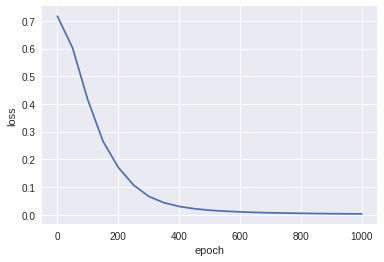

In [5]:
training_loss = torch_lr_model.get_training_loss()
plt.plot(np.array(list(range(len(training_loss)))) * 50, training_loss)

plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()